In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
import tensorflow as tf
import pathlib


desired_path = "/content/drive/MyDrive/PGA 31/DL/CNN"

# Download and extract the dataset to the desired path
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    fname="flower_photos",  # Name of the directory or file
    origin=dataset_url,     # URL of the dataset
    untar=True,             # Automatically extract the dataset
    cache_dir=desired_path  # Specify your custom path
)

# Convert the path to a pathlib object for easier manipulation
data_dir = pathlib.Path(data_dir)

# Print the dataset directory
print(f"Dataset is stored at: {data_dir}")


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Dataset is stored at: /content/drive/MyDrive/PGA 31/DL/CNN/datasets/flower_photos


In [5]:
import pathlib


flower_folders = list(data_dir.glob('*'))  # Get all subfolders in the dataset directory


for folder in flower_folders:
    if folder.is_dir():
        image_count = len(list(folder.glob('*.jpg')))
        print(f"Folder '{folder.name}' contains {image_count} images.")


Folder 'roses' contains 641 images.
Folder 'sunflowers' contains 699 images.
Folder 'tulips' contains 799 images.
Folder 'daisy' contains 633 images.
Folder 'dandelion' contains 898 images.


In [7]:
import pathlib
import random
import matplotlib.pyplot as plt
from PIL import Image

flower_folders = list(data_dir.glob('*'))  # Get all subfolders in the dataset directory


for folder in flower_folders:
    if folder.is_dir():
        images = list(folder.glob('*.jpg'))
        if len(images) >= 2:
            selected_images = random.sample(images, 2)
            print(f"Displaying images from '{folder.name}'...")


            fig, axes = plt.subplots(1, 2, figsize=(8, 4))
            for ax, img_path in zip(axes, selected_images):
                img = Image.open(img_path)
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(folder.name)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Folder '{folder.name}' has fewer than 2 images.")


Output hidden; open in https://colab.research.google.com to view.

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib


image_size = (224, 224)
batch_size = 32


data_dir = pathlib.Path("/content/drive/MyDrive/PGA 31/DL/CNN/datasets/flower_photos")

# Data augmentation and normalization
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=30,    # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,       # Shearing
    zoom_range=0.2,        # Zooming
    horizontal_flip=True,  # Horizontal flipping
    validation_split=0.2   # Split dataset into training and validation sets
)

# Training data generator
train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # One-hot encode labels
    subset='training'          # Use training subset
)

# Validation data generator
validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # One-hot encode labels
    subset='validation'        # Use validation subset
)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


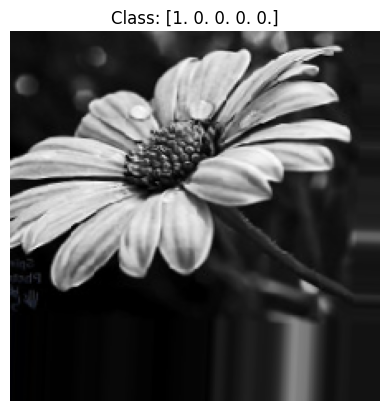

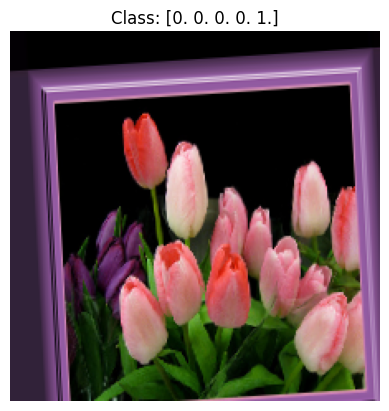

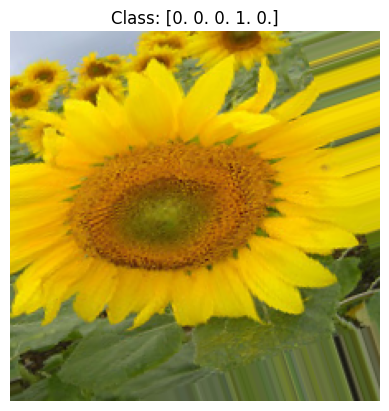

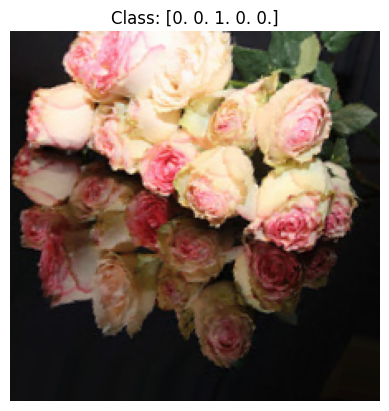

In [9]:
import matplotlib.pyplot as plt


images, labels = next(train_generator)

# Display the first 5 images
for i in range(5):
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
    plt.axis('off')
    plt.show()


In [12]:
class_names = list(train_generator.class_indices.keys())
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


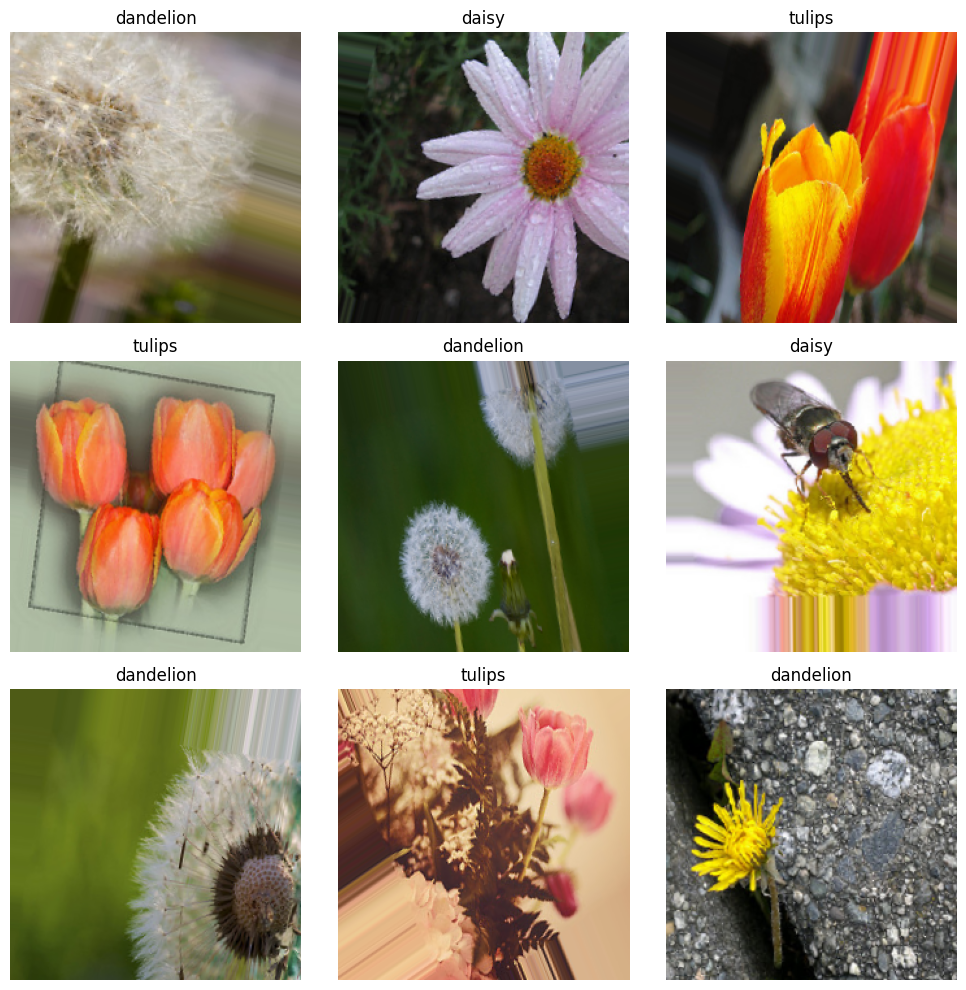

In [15]:
import matplotlib.pyplot as plt


class_names = list(train_generator.class_indices.keys())


plt.figure(figsize=(10, 10))


images, labels = next(train_generator)

for i in range(min(9, len(images))):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [16]:
import numpy as np

def softmax(z):
  '''Return the softmax output of a vector.'''
  exp_z = np.exp(z)
  sum = exp_z.sum()
  softmax_z = np.round(exp_z/sum,3)
  return softmax_z

In [17]:
z = [0.25, 1.23, -0.8]
softmax(z)

array([0.249, 0.664, 0.087])

1. **Rescaling Layer:**

* layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)): This layer rescales the pixel values from the range [0, 255] to [0, 1] by dividing by 255. It also specifies the input shape, which includes the height and width of the image and the number of color channels (3 for RGB).
2. **Convolutional Layers:**

* layers.Conv2D(16, 3, padding='same', activation='relu'): This layer creates 16 convolutional filters of size 3x3. The padding='same' argument ensures that the output size is the same as the input size by adding zero padding around the edges. The activation function relu (Rectified Linear Unit) is applied to introduce non-linearity.
* layers.MaxPooling2D(): This layer performs max pooling with a 2x2 filter, which reduces the spatial dimensions of the output by a factor of 2.
* layers.Conv2D(32, 3, padding='same', activation='relu'): Similar to the first convolutional layer, but with 32 filters.
* layers.MaxPooling2D(): Another max pooling layer.
* layers.Conv2D(64, 3, padding='same', activation='relu'): Similar to the previous convolutional layers, but with 64 filters.
* layers.MaxPooling2D(): Another max pooling layer.
3. **Flatten Layer**:

* layers.Flatten(): This layer flattens the 3D output from the convolutional layers into a 1D vector, making it suitable for the fully connected layers that follow.

4. **Fully Connected (Dense) Layers**:

* layers.Dense(128, activation='relu'): This fully connected layer has 128 units with ReLU activation, adding more capacity for learning complex patterns.

* layers.Dense(num_classes, activation='softmax'): The output layer with num_classes units (5 in this case) and a softmax activation function, which is suitable for multi-class classification. The softmax function converts the output to a probability distribution over the classes.

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = 5

# Assuming img_height and img_width are defined somewhere
img_height = 224  # Replace with your actual image height
img_width = 224   # Replace with your actual image width

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1. **Optimizer:**

* optimizer='adam': The Adam optimizer is an efficient and popular choice for training deep learning models. It combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp, which makes it well-suited for problems with sparse gradients and noisy data.
2. **Loss Function:**

* loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): The sparse categorical crossentropy loss function is used for multi-class classification problems. The from_logits=True argument indicates that the model's output layer does not have a softmax activation function applied to it, meaning the outputs are raw logits. If your model's final layer uses a softmax activation (as in your model definition), you should set from_logits=False.
3. **Metrics:**

* metrics=['accuracy']: This specifies that the accuracy metric should be used to evaluate the model's performance during training and testing.


In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [26]:
epochs=20
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.2109 - loss: 1.6097 - val_accuracy: 0.2449 - val_loss: 1.6042
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.2446 - loss: 1.6031 - val_accuracy: 0.2449 - val_loss: 1.6010
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.2532 - loss: 1.5988 - val_accuracy: 0.2449 - val_loss: 1.6003
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.2577 - loss: 1.5968 - val_accuracy: 0.2449 - val_loss: 1.6002
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.2450 - loss: 1.5992 - val_accuracy: 0.2449 - val_loss: 1.6002
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.2487 - loss: 1.5995 - val_accuracy: 0.2449 - val_loss: 1.6001
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.2576 - loss: 1.5977 - val_accuracy: 0.2449 - val_loss: 1.6002
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.2431 - loss: 1.6034 - val_accuracy: 0.2449 - val_loss: 1.

In [27]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(validation_generator)

# Print the accuracy
print(f'Test accuracy: {accuracy * 100:.2f}%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2594 - loss: 1.5964
Test accuracy: 24.49%


# Installing gradio 

In [ ]:
!pip install gradio

In [ ]:


import gradio as gr

def predict_image(image):
    image = image.resize((224, 224))  # Resize the input image
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0  # Normalize the image

    predictions = model.predict(image_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])

    return predicted_class, confidence


iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="Predicted Class"),
        gr.Textbox(label="Confidence"),
    ],
    title="Flower Image Classifier",
    description="Upload an image to classify the type of flower.",
)

iface.launch()